In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:\\Users\\marin\\Downloads\\Mall_Customers.csv")
data.head()
# Univariate Analysis 
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# check for missing values 
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\marin\AppData\Local\Temp\ipykernel_13260\420288474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

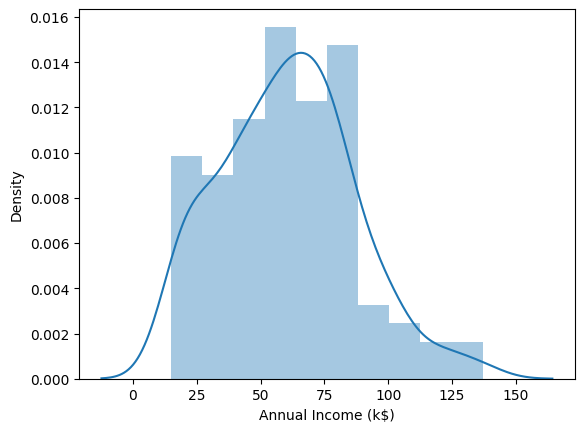

In [7]:
sns.distplot(data['Annual Income (k$)'])

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
data.columns 

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

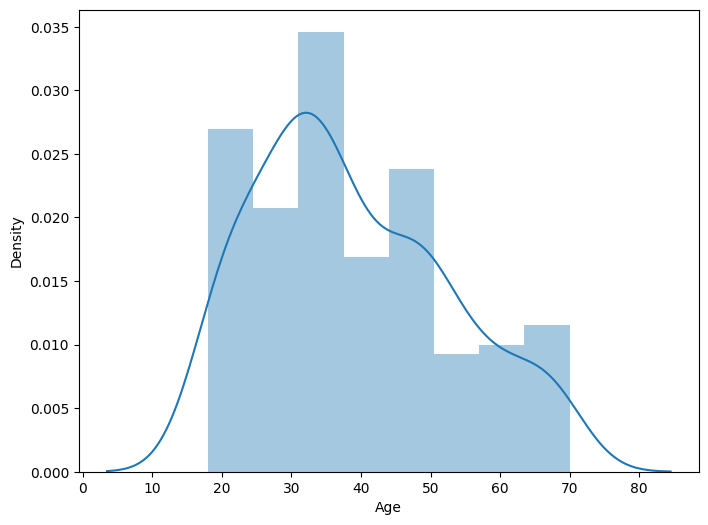

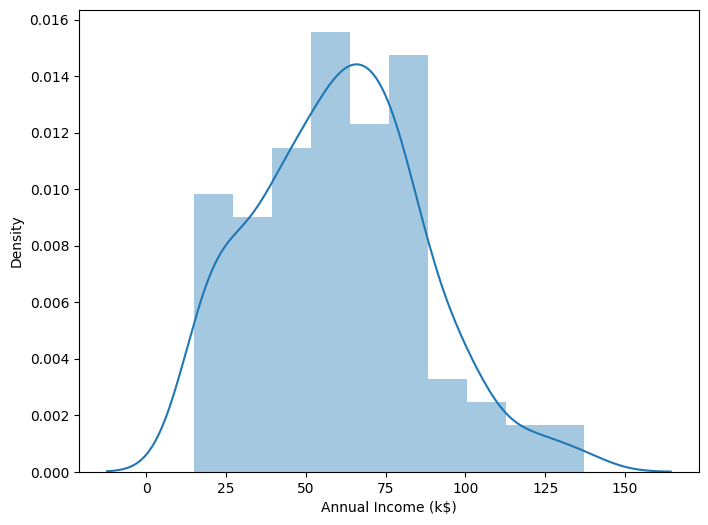

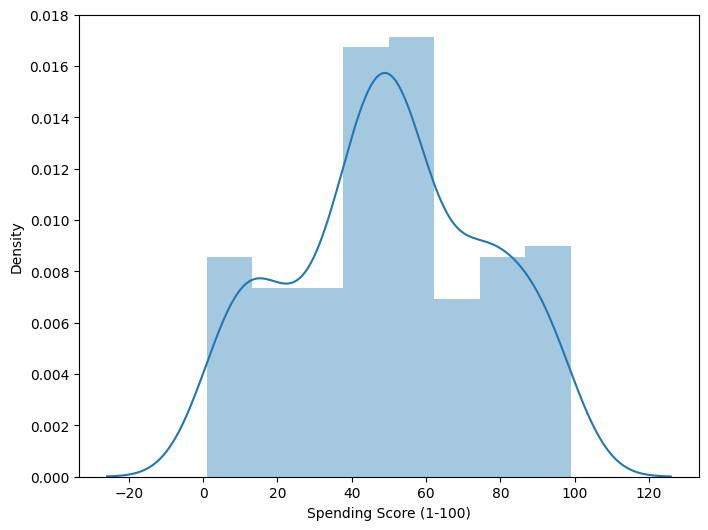

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(8,6))
    # sns.kdeplot(data[i],  hue=data.Gender, shade=True)
    sns.distplot(data[i])

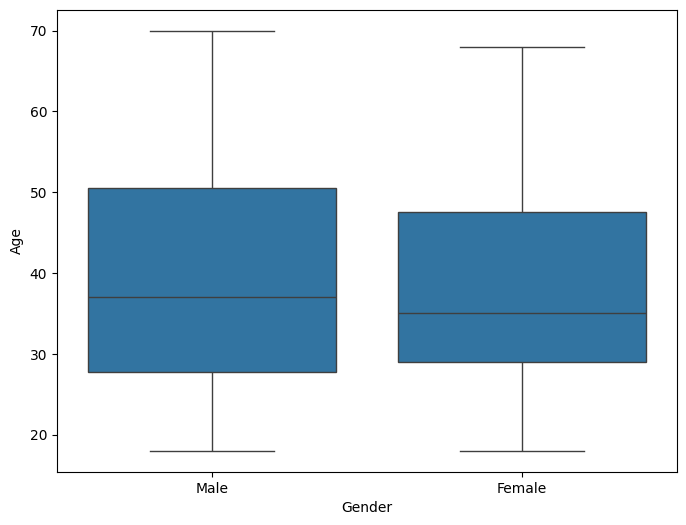

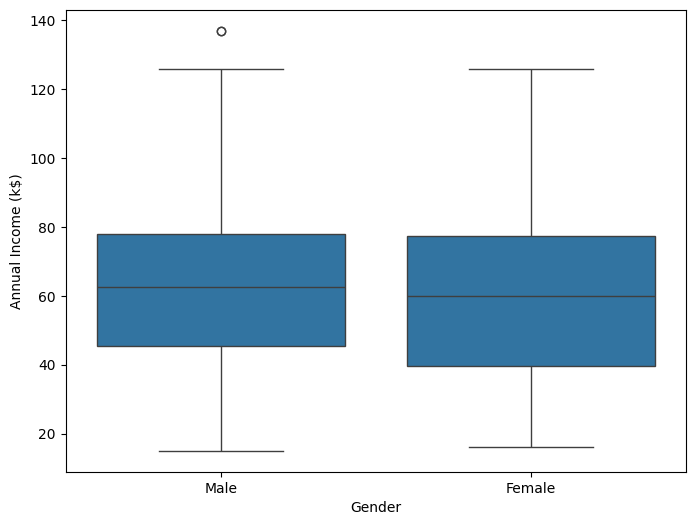

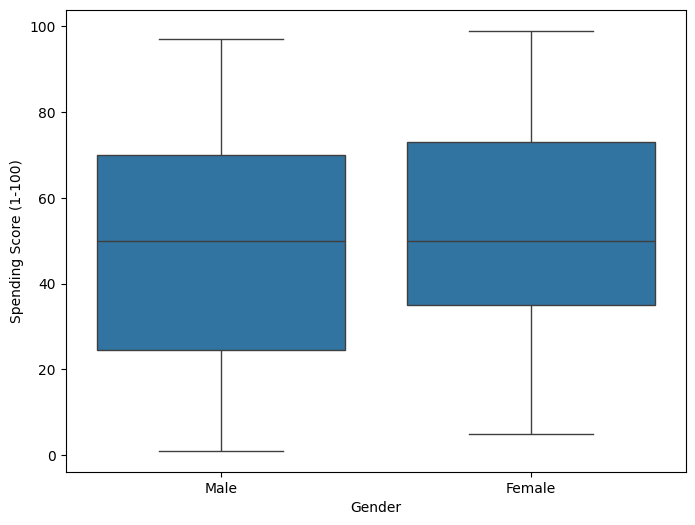

In [11]:
gen = data['Gender']
for i in columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=data, x='Gender',y=data[i])

In [12]:
data.Gender.value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [13]:
# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

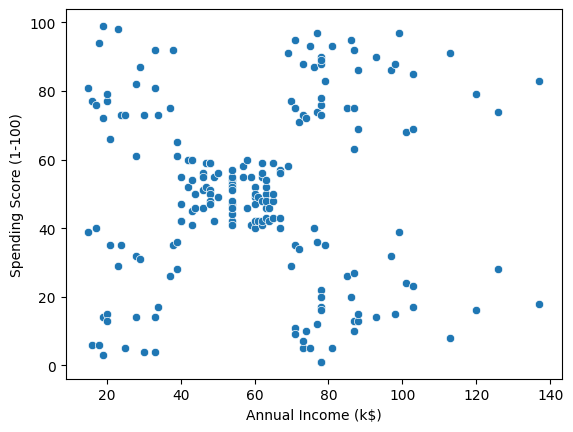

In [14]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')

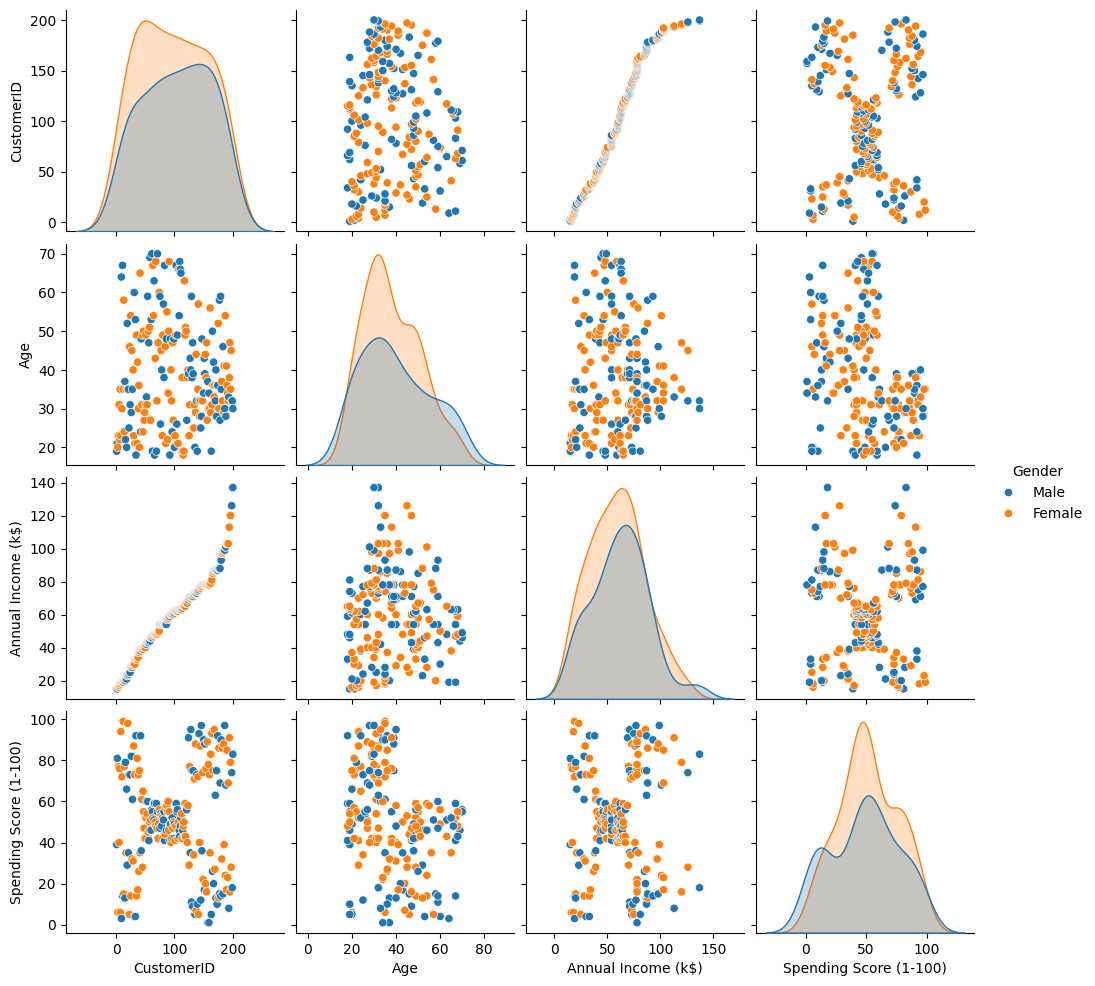

In [15]:
# data=data.drop('CustomerID',axis=1)
sns.pairplot(data, hue='Gender')

In [16]:


data.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [26]:
# Clustering - Univariate, Bivariate, Multivariate
clustering1 = KMeans(n_clusters=3)
clustering1.fit(data[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [27]:
data['Income Cluster'] = clustering1.labels_

In [28]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [29]:
data['Income Cluster'].value_counts()

Income Cluster
0    86
2    58
1    56
Name: count, dtype: int64

In [30]:
clustering1.inertia_ # represents the distance between sendroids

25640.45778439684

In [31]:
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [32]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 25640.45778439684,
 15460.429512270886,
 8481.49619047619,
 7368.399171842648,
 4113.567099567101,
 3396.2493339993352,
 2430.4579365079394,
 1905.0308010702743]

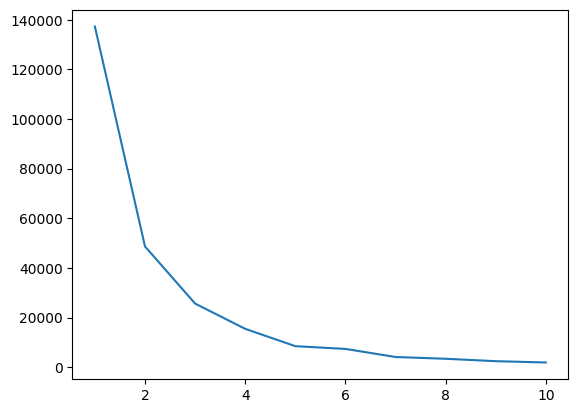

In [33]:
plt.plot(range(1,11), inertia_scores)

In [37]:
data.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


In [34]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [38]:
# Bivariate Clustering
clustering2 = KMeans()
clustering2.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
data['Spending & Income Cluster'] = clustering2.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending & Income Cluster
0,1,Male,19,15,39,2,6
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,6
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,6


In [41]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

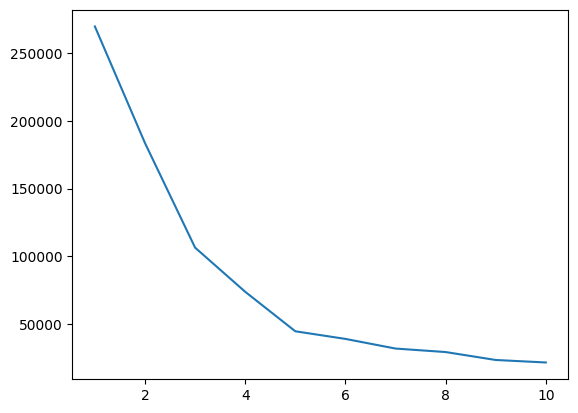

In [42]:
plt.plot(range(1,11), inertia_scores2)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

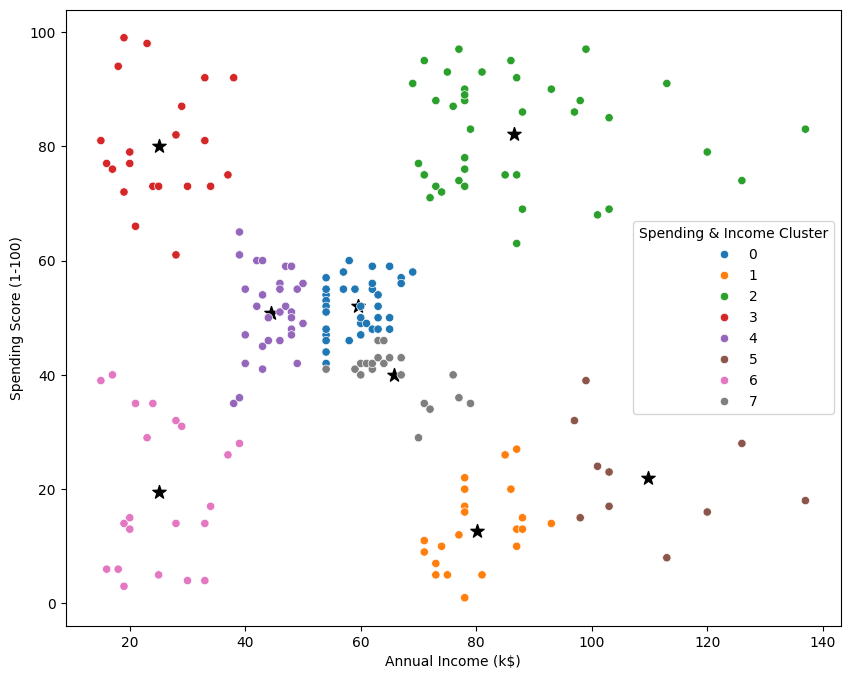

In [46]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending & Income Cluster', palette='tab10')

In [48]:
pd.crosstab(data['Spending & Income Cluster'],data['Gender'], normalize='index')

Gender,Female,Male
Spending & Income Cluster,,
0,0.571429,0.428571
1,0.318182,0.681818
2,0.538462,0.461538
3,0.571429,0.428571
4,0.625000,0.375000
5,0.700000,0.300000
6,0.619048,0.380952
7,0.600000,0.400000


In [49]:
data.groupby('Spending & Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending & Income Cluster,,,
0,41.628571,59.485714,52.000000
1,41.000000,80.181818,12.681818
2,32.692308,86.538462,82.128205
3,25.333333,25.095238,80.047619
4,45.750000,44.468750,50.812500
5,41.000000,109.700000,22.000000
6,44.142857,25.142857,19.523810
7,40.150000,65.800000,40.050000


In [50]:
# Multivariate Clustering
from sklearn.preprocessing import StandardScaler

In [51]:
scale = StandardScaler()

In [61]:
new_data = pd.get_dummies(data, drop_first=True)
new_data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending & Income Cluster,Gender_Male
0,1,19,15,39,2,6,True
1,2,21,15,81,2,3,True
2,3,20,16,6,2,6,False
3,4,23,16,77,2,3,False
4,5,31,17,40,2,6,False


In [71]:
new_data['Gender_Male'] = pd.to_numeric(new_data['Gender_Male'],downcast='signed')

In [72]:
new_data.dtypes

CustomerID                   int64
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
Income Cluster               int32
Spending & Income Cluster    int32
Gender_Male                   bool
dtype: object

In [74]:
new_data = new_data[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']]

In [78]:
new_data.dtypes

Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender_Male               int64
dtype: object

In [77]:
new_data['Gender_Male'] = new_data['Gender_Male'].astype('int64')

In [79]:
new_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [81]:
new_data = scale.fit_transform(new_data)
new_data = pd.DataFrame(scale.fit_transform(new_data))

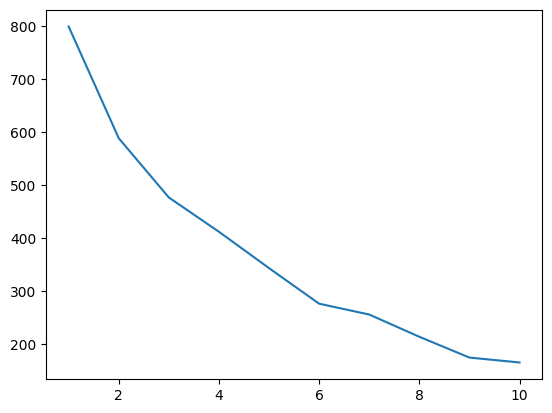

In [82]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(new_data)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)

In [ ]:
data.to_csv('Clustering.csv')